In [9]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../')

import src.viz

#sns.set(style="white", context="notebook")

In [10]:
#df1 = pd.read_csv('../../data/toy_model/interim/entropy_scan_no_position.csv')
df2 = pd.read_csv('../../data/toy_model/interim/entropy_scan.csv')
#df = pd.concat([df1,df2],ignore_index=True)
#df = df1
df = pd.read_csv('../../data/toy_model/interim/entropy.csv')
#df_solo_position = pd.read_csv('../../data/toy_model/interim/entropy_scan_position_only.csv')

Look at the entropy production using absolute value of the torsion angle.

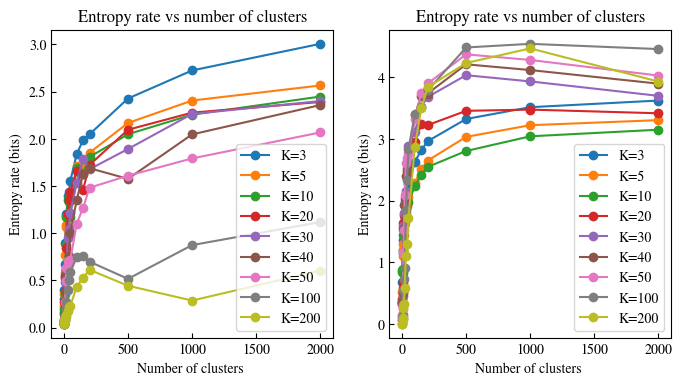

In [11]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))

for K, group in df.groupby("K"):
    ax[0].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")

ax[0].set_xlabel("Number of clusters ")
ax[0].set_ylabel("Entropy rate (bits)")
ax[0].set_title("Entropy rate vs number of clusters")
#ax[0].set_xlim(0,10)
#ax[0].set_ylim(0,1)
#ax[0].set_xscale('log')
ax[0].legend()


for K, group in df2.groupby("K"):
    ax[1].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
#
ax[1].set_xlabel("Number of clusters ")
ax[1].set_ylabel("Entropy rate (bits)")
ax[1].set_title("Entropy rate vs number of clusters")
ax[1].legend()
#
#for K, group in df_solo_position.groupby("K"):
#    ax[2].plot(group["n_clusters"], group["entropy_rate"], marker='o', label=f"K={K}")
#
#ax[2].set_xlabel("Number of clusters ")
#ax[2].set_ylabel("Entropy rate (bits)")
#ax[2].set_title("Entropy rate vs number of clusters")
#ax[2].legend()

We select K = N_clusters = 30